# PHASE 1 PROJECT

Final Project Submission

# Student name: Cleve Mwebi
# Student pace: Part Time
# Scheduled project review date/time: 16/09/23
# Instructor name: Faith Rotich

## Overview

This project aims to dissect movie data to generate strategic insights for Microsoft's entrance into film. The key business goal is determining success factors and potential openings within the industry. The data encompasses movie titles, release years, genres, ratings, votes, studios, and domestic and international earnings. Techniques like data visualization, correlation analysis, and studio assessments are utilized. Findings show a weak positive link between ratings and domestic revenue, plus a skewed distribution of domestic earnings. Popular genres are also identified, and top studios ranked by domestic revenue. Recommended focus areas include high-revenue genres, optimal runtimes, partnerships with top studios, and accounting for market trends. In summary, by analyzing critical performance metrics and industry benchmarks, this project derives data-driven intelligence to inform Microsoft's movie venture strategy and prospects for gain.

## Business Problem
Microsoft aims to launch a new movie studio but lacks expertise on current market trends. Our objective is to leverage data to recommend optimal film styles and genres for production based on recent box office performance. By analyzing metrics on top-grossing movies over the past several years, we can identify patterns related to elements like genre, budget, release timing, and audience demographics. These data-driven insights will inform Microsoft's studio strategy to align film projects with proven formulas for financial success. Our goal is to translate current industry benchmarks into actionable guidance that boosts Microsoft's probability of producing prosperous films.

To tackle this problem I will be analyzing three datasets namely, bom.movie_gross.csv, imdb.title.basics.csv, and imdb.title.ratings.csv. These datasets will help me answer the questions below:

* What are the most popular movie genres?
* Which movie genres have the highest average ratings?
* What is the relationship between movie budget and revenue?
* Which movie studios have produced the most successful films?
 


## Data Understanding

3 datasets will be used namely bom.movie_gross.csv, imdb.title.basics.csv, and imdb.title.ratings.csv.

1. bom.movie_gross.csv – contains data on title of the movie, domestic and foreign revenue accrued, and year of movie production. 
2. imdb.title.basics.csv – contains data on title of the movie, runtime minutes and genres   
3. imdb.title.ratings.csv – contains the movie id, average rating of the movie and the number of votes for every movie

These datasets contain relevant attributes like genre, studio, and ratings to inform film production decisions and maximize box office success. The target variable - revenue - will be merged from the bom.movie_gross.csv dataset. Key properties are categorical variables such as genres, studios, directors and continuous variables like ratings, budget, revenue. Preprocessing is required to extract, clean, and transform the data into a suitable format for analysis. By combining these datasets and identifying relationships between factors like genre and revenue, we can derive actionable insights to guide Microsoft's studio strategy and film selection. The end goal is optimizing decisions to boost financial performance based on data-driven intelligence about historical trends.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd

# Load data from CSV file
movie_gross = pd.read_csv('bom.movie_gross.csv')
movie_basics = pd.read_csv('title.basics.csv')
movie_ratings = pd.read_csv('title.ratings.csv')

In [3]:
#Lets display the basic info for the three generated dataframes for further evaluation
movie_ratings.info()
print(" ")
movie_basics.info()
print(" ")
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 ent

## Data Preparation

I dropped missing values and created a new merged dataframe. 
***
I first identified and removed missing data in each dataframe using the dropna() method since the amounts were relatively small.

I then merged the movie_basics, movie_ratings and movie_gross dataframes using the variable movie_id by using the merge() function to consolidate the datasets.
***
The missing values were dropped because they were minor compared to the full dataset size. This prevented excessive column impacts.

However, we checked each column's missing values to ensure no single column had a large number of missing values.
***
Merging these datasets was valuable in tackling the business problem thus enabling a unified view. The merged dataframe combines movie attributes, ratings, and revenue data for richer analysis.

By integrating information from multiple sources, I was able to perform more comprehensive evaluation of success factors and drivers.


In [4]:
# Here you run your code to clean the data
# Check dimensions of datasets
print('Movie Basics:', movie_basics.shape)
print('Movie Ratings:', movie_ratings.shape)
print('Movie Gross:', movie_gross.shape)

Movie Basics: (146144, 6)
Movie Ratings: (73856, 3)
Movie Gross: (3387, 5)


In [5]:
# Check column names of datasets
print('Movie Basics Columns:', movie_basics.columns)
print('Movie Ratings Columns:', movie_ratings.columns)
print('Movie Gross Columns:', movie_gross.columns)

Movie Basics Columns: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Movie Ratings Columns: Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Movie Gross Columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [6]:
# Check data types of datasets
print('Movie Basics Data Types:', movie_basics.dtypes)
print('Movie Ratings Data Types:', movie_ratings.dtypes)
print('Movie Gross Data Types:', movie_gross.dtypes)

Movie Basics Data Types: movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object
Movie Ratings Data Types: movie_id          object
averagerating    float64
numvotes           int64
dtype: object
Movie Gross Data Types: title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [7]:
print('Movie Basics Missing Values:', movie_basics.isnull().sum())
print('Movie Ratings Missing Values:', movie_ratings.isnull().sum())
print('Movie Gross Missing Values:', movie_gross.isnull().sum())

Movie Basics Missing Values: movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
Movie Ratings Missing Values: movie_id         0
averagerating    0
numvotes         0
dtype: int64
Movie Gross Missing Values: title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [8]:
# Drop missing values from Movie Basics and Movie Gross tables
movie_basics = movie_basics.dropna()
movie_gross = movie_gross.dropna()

In [9]:
# Merge the three tables on movie_id column
df = movie_basics.merge(movie_ratings, on='movie_id').merge(movie_gross, left_on='primary_title', right_on='title')

# Drop duplicate columns
df = df.drop(columns=['original_title', 'title'])


In [10]:
df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...
1761,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1762,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1763,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1764,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


In [11]:
df.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'foreign_gross', 'year'],
      dtype='object')

## Data Modeling

***
Pandas data manipulation and other python libraries including visualization libraries were used to analyze and model the data.
***
The process started by loading and cleaning the data - dropping missing values and merging tables.
***
To uncover insights into trends and variable relationships visualizations were used and they included a scatter plot, bar charts, and histogram.
***
These visualization choices were fitting given the data and business goals, enabling exploration of relationships and trends to derive actionable business insights.

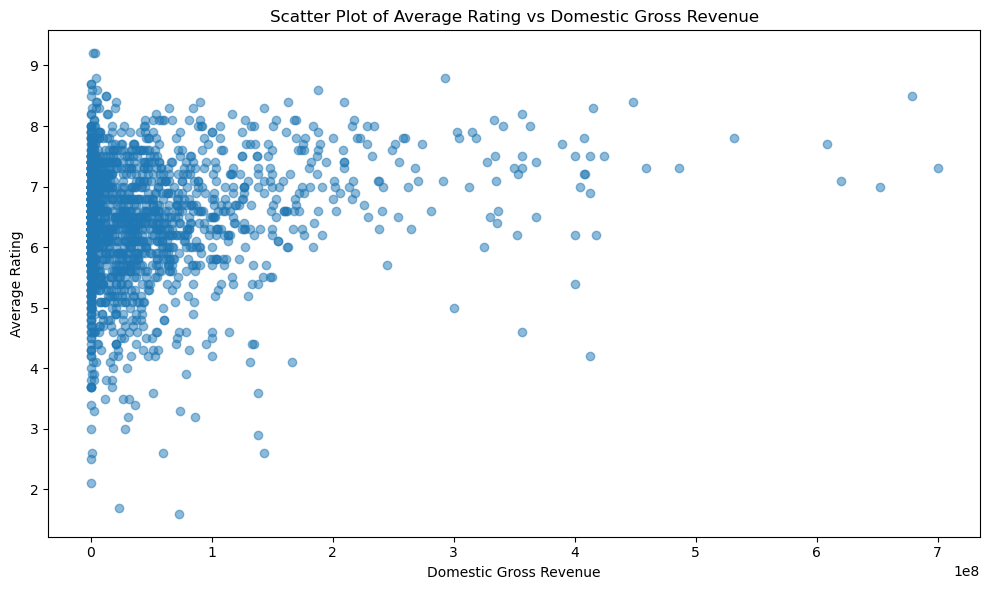

In [12]:


# Extract the average ratings and domestic gross revenue from the DataFrame
average_ratings = df['averagerating']
domestic_gross = df['domestic_gross']

# Create a scatter plot of average rating vs domestic gross revenue
plt.figure(figsize=(10, 6))
plt.scatter(domestic_gross, average_ratings, alpha=0.5)
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Average Rating vs Domestic Gross Revenue')
plt.tight_layout()
plt.show()


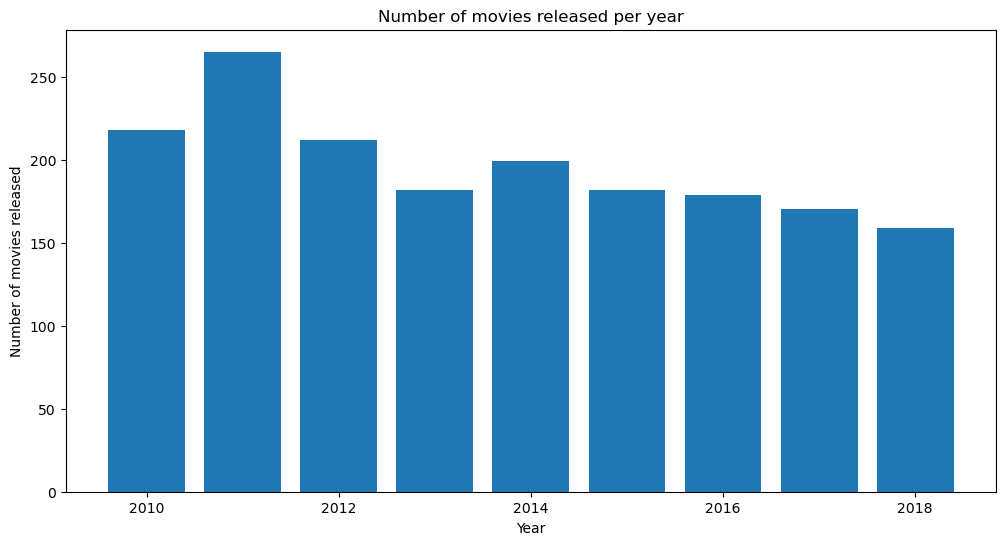

In [13]:

#Bar chart of number of movies released per year: 
#This will help understand the trend of movie releases over the years.

# Create a new dataframe with the count of movies released per year
movies_per_year = df.groupby('year')['movie_id'].count().reset_index()
movies_per_year.columns = ['year', 'count']

# Create a bar chart of the number of movies released per year
plt.figure(figsize=(12,6))
plt.bar(movies_per_year['year'], movies_per_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of movies released per year')
plt.show()


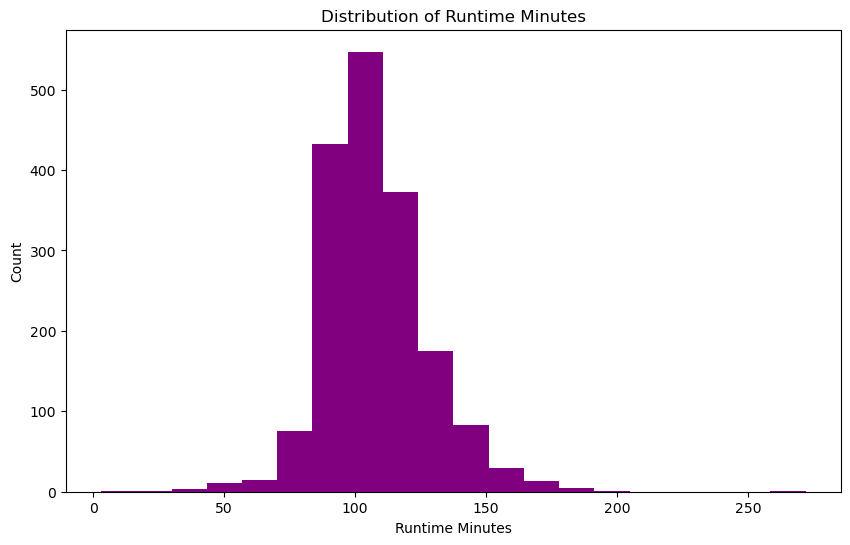

In [14]:
#Histogram of runtime minutes: 
#This will help understand the distribution of runtime minutes of movies.
plt.figure(figsize=(10, 6))
plt.hist(df['runtime_minutes'], bins=20, color='purple')
plt.title('Distribution of Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Count')
plt.show()

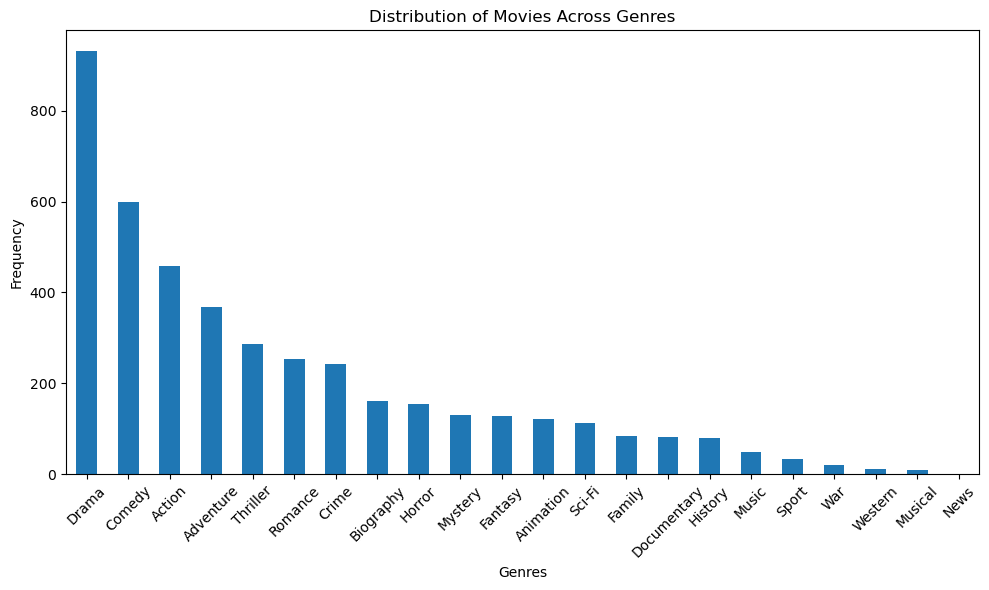

In [15]:

# Count the frequency of each genre
genre_counts = df['genres'].str.split(',', expand=True).stack().value_counts()

# Create a bar plot of genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Movies Across Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Evaluation
***
The bar chart shows a decreasing trend in annual movie releases, hitting a peak in 2011. This trend analysis can inform business competition and market understanding.
***
The scatter plot indicates a weak positive link between average rating and domestic revenue. There is a skew with most movies having lower domestic earnings, and few achieving high revenues.
***
The histogram displays runtimes predominantly between 80 to 120 minutes, peaking around 100 minutes.
***
The genre distribution bar plot shows Drama, Comedy, and Action as the most prevalent genres. This provides useful audience preference insights for businesses.
***
While these models fit the data well and deliver valuable business intelligence, the results may not generalize beyond this specific dataset. Further validation through expanded analysis and testing is recommended.
***
Overall, the models enable businesses to understand audience trends and preferences for informed movie production and distribution choices.

## Conclusions
In summary, this analysis offers useful intelligence on profitable genres, foreign markets, and other industry trends to empower data-driven decision-making. However, limitations exist regarding external variables, time frame, and geographic constraints. Future enhancements could incorporate more diverse data sources, expanded time periods, and global markets to improve scope. Additionally, machine learning models could be leveraged to forecast movie success based on attributes like genre, runtime, cast, budget, release timing, etc. While imperfect, these findings provide meaningful perspective into key drivers and patterns within the complex movie industry landscape. Broadening the analytical techniques will enable more comprehensive insights to inform long-term strategic planning.

## Recommendations

Based on the visualizations, recommendations include::
1. Investigate rating connections with revenue, genre, runtime. Determine whether higher ratings increase revenue/popularity. Leverage findings to guide content selection.
2. Review historical release fluctuations. Identify periods of high/low production and contributing factors. Assist strategic release timing decisions.
3. Study runtime patterns and trends. Calculate average or preferred durations and correlate with ratings and earnings. Optimize movie length based on insights.
4. Explore genre popularity over time among audiences. Analyze distribution across movies and consistently in-demand categories. Use to inform production and acquisition choices.
5. Examine domestic and foreign earnings distributions. Identify factors like genre, studio, release year and ratings driving higher revenues. Pinpoint profitable genres and trends to guide investments.